In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [2]:

raw_dataset = pd.read_csv('Dallas data summary backfiled.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()


features.head(60)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,3/1/2005,117.37315,5.93,37170,5816.407,5.3,284456.508,1254.0813,43.20%,133706,2.30%,4281,4.19,188.900
1,4/1/2005,118.36502,5.86,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134186,2.30%,5548,4.69,196.600
2,5/1/2005,119.47166,5.72,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134186,2.30%,4878,4.58,196.600
3,6/1/2005,120.02775,5.58,39903,5999.411,5.4,307562.122,1254.0813,43.40%,134186,2.30%,5304,4.83,196.600
4,7/1/2005,120.82903,5.70,39903,5999.411,5.4,307562.122,1254.0813,43.40%,134032,2.30%,5140,5.06,196.600
5,8/1/2005,121.15007,5.82,39903,5999.411,5.2,307562.122,1254.0813,43.40%,134032,2.30%,6042,4.36,196.600
6,9/1/2005,121.62157,5.77,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134032,2.30%,4361,4.39,196.600
7,10/1/2005,121.66380,6.07,39903,5999.411,4.8,307562.122,1254.0813,43.20%,134539,2.50%,4814,4.45,196.600
8,11/1/2005,122.11284,6.33,39903,5999.411,5.0,307562.122,1254.0813,43.20%,134539,2.50%,4713,4.34,196.600
9,12/1/2005,122.20399,6.27,39903,5999.411,4.8,307562.122,1254.0813,43.20%,134539,2.50%,5458,4.32,196.600


In [3]:
features=features.drop('Date',axis=1)
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,117.37315,5.93,37170,5816.407,5.3,284456.508,1254.0813,133706,4281,4.19,188.9,43.2,2.3
1,118.36502,5.86,39903,5999.411,5.1,307562.122,1254.0813,134186,5548,4.69,196.6,43.4,2.3
2,119.47166,5.72,39903,5999.411,5.1,307562.122,1254.0813,134186,4878,4.58,196.6,43.4,2.3
3,120.02775,5.58,39903,5999.411,5.4,307562.122,1254.0813,134186,5304,4.83,196.6,43.4,2.3
4,120.82903,5.70,39903,5999.411,5.4,307562.122,1254.0813,134032,5140,5.06,196.6,43.4,2.3


In [4]:
features.isna().sum()

House_Price_Index(S&P/Case-Shiller)      0
Mortgage_Rate (30 yers)                  0
Personal_Income                          0
Resident_Population                      0
Unemployment_Rate                        0
GDP                                      0
Crime_Rate                               0
Median_Debt                              0
New_Structures                           0
Economic_Conditions_Index                0
CPI all items less shelter               0
Percent_With_Mortgage_Debt               0
Percent_With_Severely_Delinquent_Debt    0
dtype: int64

In [5]:

test_dataset = features.iloc[46:58]
train_dataset = features.drop(index=[46,47,48,49,50,51,52,53,54,55,56,57])

In [6]:
train_dataset.tail(40)

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
126,155.26289,3.89,51428,7194.758,4.0,453858.011,694.1751,131480,4683,3.53,219.736,36.4,1.9
127,155.79351,3.80,51428,7194.758,3.9,453858.011,694.1751,133259,4979,3.60,219.736,36.2,1.9
128,156.10632,3.94,51428,7194.758,3.9,453858.011,694.1751,133259,3712,3.48,219.736,36.2,1.9
129,156.43941,3.96,51428,7194.758,3.6,453858.011,694.1751,133259,4354,4.06,219.736,36.2,1.9
130,156.62929,3.87,51428,7194.758,3.8,453858.011,762.4122,134215,3504,4.55,219.736,36.2,1.7
131,157.46172,3.66,53870,7337.097,3.8,1699894.281,762.4122,134215,3628,4.19,221.248,36.2,1.7
132,159.71940,3.69,53870,7337.097,3.8,1699894.281,762.4122,134215,4028,3.76,221.248,36.2,1.7
133,161.71003,3.61,53870,7337.097,3.6,1699894.281,762.4122,133964,4028,3.83,221.248,35.7,1.5
134,163.81696,3.60,53870,7337.097,3.6,1699894.281,762.4122,133964,4692,3.43,221.248,35.7,1.5
135,165.21480,3.57,53870,7337.097,4.1,1699894.281,762.4122,133964,4932,3.38,221.248,35.7,1.5


In [7]:
train_stats = train_dataset.describe()
train_stats.pop('House_Price_Index(S&P/Case-Shiller)')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),154.0,4.730195,1.036827,3.3500,3.9125,4.3600,5.8500,6.760000e+00
Personal_Income,154.0,48002.116883,5947.330597,37170.0000,43441.0000,47092.0000,51428.0000,5.872500e+04
Resident_Population,154.0,6791.369760,485.355124,5816.4070,6447.6150,6753.8890,7194.7580,7.573136e+03
Unemployment_Rate,154.0,5.189610,1.473920,3.2000,4.0000,4.8000,6.1000,8.600000e+00
GDP,154.0,497645.602818,356718.854111,284456.5080,340573.5870,392917.4470,453858.0110,1.699894e+06
Crime_Rate,154.0,825.746170,198.191523,663.7371,681.1003,762.4122,894.8343,1.254081e+03
Median_Debt,154.0,134568.987013,5684.935431,127063.0000,130171.7500,134355.0000,136509.2500,1.514860e+05
New_Structures,154.0,3658.870130,1398.772602,1098.0000,2552.5000,3605.0000,4759.5000,8.213000e+03
Economic_Conditions_Index,154.0,3.793636,1.248669,-3.2100,3.6350,4.0450,4.4050,5.220000e+00
CPI all items less shelter,154.0,216.711143,9.835529,188.9000,209.9450,220.0640,224.3180,2.288810e+02


In [8]:
train_labels = train_dataset.pop('House_Price_Index(S&P/Case-Shiller)')
test_labels = test_dataset.pop('House_Price_Index(S&P/Case-Shiller)')

In [9]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.head(20)

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.157190,-1.821341,-2.008762,0.074895,-0.597639,2.161218,-0.151802,0.444768,0.317429,-2.827620,1.039722,-0.296280
1,1.089676,-1.361807,-1.631710,-0.060797,-0.532866,2.161218,-0.067369,1.350563,0.717855,-2.044744,1.098149,-0.296280
2,0.954649,-1.361807,-1.631710,-0.060797,-0.532866,2.161218,-0.067369,0.871571,0.629762,-2.044744,1.098149,-0.296280
3,0.819621,-1.361807,-1.631710,0.142742,-0.532866,2.161218,-0.067369,1.176124,0.829975,-2.044744,1.098149,-0.296280
4,0.935359,-1.361807,-1.631710,0.142742,-0.532866,2.161218,-0.094458,1.058878,1.014171,-2.044744,1.098149,-0.296280
5,1.051097,-1.361807,-1.631710,0.007049,-0.532866,2.161218,-0.094458,1.703729,0.453574,-2.044744,1.098149,-0.296280
6,1.002873,-1.361807,-1.631710,-0.060797,-0.532866,2.161218,-0.094458,0.501961,0.477600,-2.044744,1.098149,-0.296280
7,1.292217,-1.361807,-1.631710,-0.264336,-0.532866,2.161218,-0.005275,0.825817,0.525651,-2.044744,1.039722,-0.096161
8,1.542982,-1.361807,-1.631710,-0.128644,-0.532866,2.161218,-0.005275,0.753611,0.437557,-2.044744,1.039722,-0.096161
9,1.485113,-1.361807,-1.631710,-0.264336,-0.532866,2.161218,-0.005275,1.286220,0.421540,-2.044744,1.039722,-0.096161


In [10]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [11]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [12]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.3280897 ],
       [-0.14059046],
       [-0.21960391],
       [-0.19490334],
       [-0.18012589],
       [-0.15007932],
       [-0.3166818 ],
       [-0.216035  ],
       [-0.24562187],
       [-0.15069395]], dtype=float32)

In [13]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 400

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

KeyError: 'val_mae'

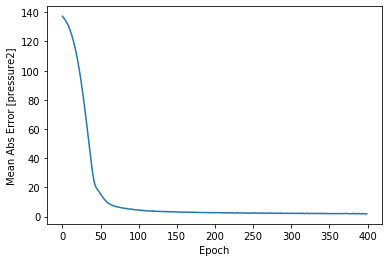

In [14]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [pressure2]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,200])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [pressure2^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,40000])
  plt.legend()
  plt.show()


plot_history(history)

Mean Absolute Error: 8.84
Accuracy: 92.54 %.


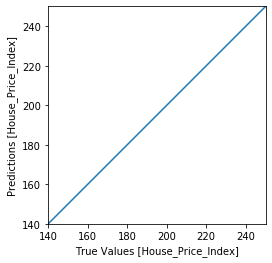

In [15]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 250]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

test_errors = abs(test_predictions - test_labels)


print('Mean Absolute Error:', round(np.mean(test_errors), 2))

mape = np.mean(100 * (test_errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.78
Accuracy: 98.69 %.


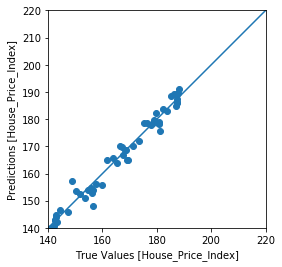

In [16]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
train_errors = abs(train_predictions - train_labels)


print('Mean Absolute Error:', round(np.mean(train_errors), 2))

mape = np.mean(100 * (train_errors / train_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [17]:
prediction_features=features   #produce prediction result
prediction_features

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,117.37315,5.93,37170,5816.407,5.3,284456.508,1254.0813,133706,4281,4.19,188.900,43.2,2.3
1,118.36502,5.86,39903,5999.411,5.1,307562.122,1254.0813,134186,5548,4.69,196.600,43.4,2.3
2,119.47166,5.72,39903,5999.411,5.1,307562.122,1254.0813,134186,4878,4.58,196.600,43.4,2.3
3,120.02775,5.58,39903,5999.411,5.4,307562.122,1254.0813,134186,5304,4.83,196.600,43.4,2.3
4,120.82903,5.70,39903,5999.411,5.4,307562.122,1254.0813,134032,5140,5.06,196.600,43.4,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,187.43342,4.55,58725,7573.136,3.6,523861.973,764.9371,150174,5416,4.18,228.881,34.4,1.1
162,187.42928,4.63,58725,7573.136,3.4,523861.973,764.9371,150174,4336,4.02,228.881,34.4,1.1
163,187.49068,4.83,58725,7573.136,3.3,523861.973,764.9371,151486,4505,4.09,228.881,34.0,1.1
164,187.88942,4.87,58725,7573.136,3.2,523861.973,764.9371,151486,4920,4.05,228.881,34.0,1.1


In [18]:
prediction_features.pop('House_Price_Index(S&P/Case-Shiller)')
normed_prediction_features=norm(prediction_features)
prediction_result=model.predict(normed_prediction_features)
prediction_result=pd.DataFrame(prediction_result)
rawdataset=raw_dataset.join(prediction_result)
rawdataset                              

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,0
0,3/1/2005,117.37315,5.93,37170,5816.407,5.3,284456.508,1254.0813,43.20%,133706,2.30%,4281,4.19,188.900,123.946770
1,4/1/2005,118.36502,5.86,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134186,2.30%,5548,4.69,196.600,121.202461
2,5/1/2005,119.47166,5.72,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134186,2.30%,4878,4.58,196.600,118.108086
3,6/1/2005,120.02775,5.58,39903,5999.411,5.4,307562.122,1254.0813,43.40%,134186,2.30%,5304,4.83,196.600,116.448830
4,7/1/2005,120.82903,5.70,39903,5999.411,5.4,307562.122,1254.0813,43.40%,134032,2.30%,5140,5.06,196.600,118.837936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,8/1/2018,187.43342,4.55,58725,7573.136,3.6,523861.973,764.9371,34.40%,150174,1.10%,5416,4.18,228.881,186.291641
162,9/1/2018,187.42928,4.63,58725,7573.136,3.4,523861.973,764.9371,34.40%,150174,1.10%,4336,4.02,228.881,187.569672
163,10/1/2018,187.49068,4.83,58725,7573.136,3.3,523861.973,764.9371,34.00%,151486,1.10%,4505,4.09,228.881,189.347198
164,11/1/2018,187.88942,4.87,58725,7573.136,3.2,523861.973,764.9371,34.00%,151486,1.10%,4920,4.05,228.881,189.517120


In [19]:
rawdataset.to_csv('prediction-result.csv',index = False, header=True)

In [ ]:
#NY result test
NY_raw_dataset = pd.read_csv('NY summarized table from 2015.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

NY_features = NY_raw_dataset.copy()
NY_features=NY_features.drop('Date',axis=1)

NY_features.tail(40)

In [ ]:
mort_debt = np.array(NY_features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
NY_features = NY_features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(NY_features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
NY_features =NY_features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

NY_features['Percent_With_Mortgage_Debt'] = mdebt
NY_features['Percent_With_Severely_Delinquent_Debt'] = ddebt
NY_features.head()

In [ ]:
NY_labels = NY_features.pop('House_Price_Index(S&P/Case-Shiller)')

In [ ]:
NY_labels

In [ ]:
NY_features

In [ ]:
normed_NY_features=norm(NY_features)

In [ ]:
NY_predictions = model.predict(normed_NY_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(NY_labels, NY_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
train_errors = abs(NY_predictions - NY_labels)


print('Mean Absolute Error:', round(np.mean(train_errors), 2))

mape = np.mean(100 * (train_errors / train_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')